In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
data1 = pd.read_csv('/content/test_AbJTz2l.csv')

In [121]:
data = pd.read_csv('/content/train_v9rqX0R.csv')

In [122]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [123]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [124]:
#preprocessing on train data

In [125]:
## Missing values handling

In [126]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [128]:
#outlet size

In [129]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [130]:
data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [131]:
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [132]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [133]:
#item weight

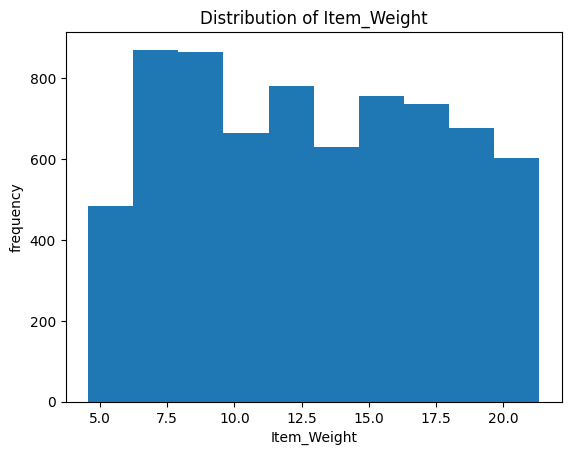

In [134]:
plt.hist(data['Item_Weight'])
plt.title('Distribution of Item_Weight')
plt.xlabel('Item_Weight')
plt.ylabel('frequency')
plt.show()

In [135]:
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [136]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [137]:
## Outlier detection

In [138]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [139]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [140]:
## Encoding

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [142]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [143]:
dict1 = {'Low Fat':0,'LF':0,'low fat':0,'reg':1,'Regular':1}

In [144]:
data['Item_Fat_Content']=data['Item_Fat_Content'].map(dict1)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 799.2+ KB


In [146]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [147]:
dict2 = {'Dairy':0, 'Soft Drinks':1, 'Meat':2, 'Fruits and Vegetables':3,
       'Household':4, 'Baking Goods':5, 'Snack Foods':6, 'Frozen Foods':7,
       'Breakfast':8, 'Health and Hygiene':9, 'Hard Drinks':10, 'Canned':11,
       'Breads':12, 'Starchy Foods':13, 'Others':14, 'Seafood':15}

In [148]:
data['Item_Type']=data['Item_Type'].map(dict2)

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 799.2+ KB


In [150]:
data['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [151]:
dict3 = {'Medium':0, 'High':1, 'Small':2}

In [152]:
data['Outlet_Size']=data['Outlet_Size'].map(dict3)

In [153]:
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [154]:
dict4 = {'Tier 1':0, 'Tier 2':1,'Tier 3':2}

In [155]:
data['Outlet_Location_Type']=data['Outlet_Location_Type'].map(dict4)

In [156]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [157]:
dict5 = {'Supermarket Type1':0, 'Supermarket Type2':1,'Supermarket Type3':2,'Grocery Store':4 }

In [158]:
data['Outlet_Type']=data['Outlet_Type'].map(dict5)

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 799.2+ KB


In [160]:
data.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,5.651062,140.992782,1997.831867,0.669717,1.112871,0.836560,2181.288914
std,4.226124,0.477836,0.051598,3.669141,62.275067,8.371760,0.884112,0.812757,1.371557,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,0.000000,0.026989,3.000000,93.826500,1987.000000,0.000000,0.000000,0.000000,834.247400
50%,12.857645,0.000000,0.053931,5.000000,143.012800,1999.000000,0.000000,1.000000,0.000000,1794.331000
75%,16.000000,1.000000,0.094585,7.000000,185.643700,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,1.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,4.000000,13086.964800


In [161]:
#preprocessing on test data

In [162]:
## Missing values handling

In [163]:
data1.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [164]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [165]:
#outlet size

In [166]:
data1['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [167]:
data1['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [168]:
data1['Outlet_Size']=data1['Outlet_Size'].fillna(data1['Outlet_Size'].mode()[0])

In [169]:
data1.isna().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [170]:
#item weight

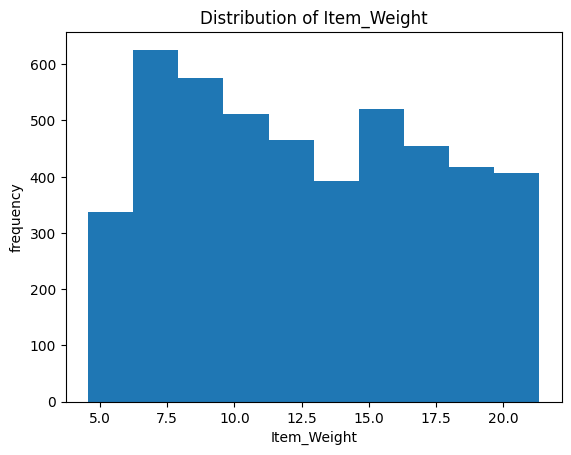

In [171]:
plt.hist(data1['Item_Weight'])
plt.title('Distribution of Item_Weight')
plt.xlabel('Item_Weight')
plt.ylabel('frequency')
plt.show()

In [172]:
data1['Item_Weight']=data1['Item_Weight'].fillna(data1['Item_Weight'].mean())

In [173]:
data1.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [174]:
## Encoding

In [175]:
data1['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [176]:
dict6 = {'Low Fat':0,'LF':0,'low fat':0,'reg':1,'Regular':1}

In [177]:
data1['Item_Fat_Content']=data1['Item_Fat_Content'].map(dict6)

In [178]:
data1['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

In [179]:
dict7 = {'Dairy':0, 'Soft Drinks':1, 'Meat':2, 'Fruits and Vegetables':3,
       'Household':4, 'Baking Goods':5, 'Snack Foods':6, 'Frozen Foods':7,
       'Breakfast':8, 'Health and Hygiene':9, 'Hard Drinks':10, 'Canned':11,
       'Breads':12, 'Starchy Foods':13, 'Others':14, 'Seafood':15}

In [180]:
data1['Item_Type']=data1['Item_Type'].map(dict7)

In [181]:
data1['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [182]:
dict8 = {'Medium':0, 'High':1, 'Small':2}

In [183]:
data1['Outlet_Size']=data1['Outlet_Size'].map(dict8)

In [184]:
data1['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [185]:
dict9 = {'Tier 1':0, 'Tier 2':1,'Tier 3':2}

In [186]:
data1['Outlet_Location_Type']=data1['Outlet_Location_Type'].map(dict9)

In [187]:
data1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [188]:
dict10 = {'Supermarket Type1':0, 'Supermarket Type2':1,'Supermarket Type3':2,'Grocery Store':4 }

In [189]:
data1['Outlet_Type']=data1['Outlet_Type'].map(dict10)

In [190]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int64  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   int64  
 9   Outlet_Location_Type       5681 non-null   int64  
 10  Outlet_Type                5681 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 488.3+ KB


In [191]:
x = data[['Item_Weight',	'Item_Fat_Content',	'Item_Visibility',	'Item_Type',	'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',	'Outlet_Location_Type','Outlet_Type'	]]
y = data['Item_Outlet_Sales']


In [192]:
## Modeling

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [195]:
from sklearn.linear_model import LinearRegression

In [196]:
lr = LinearRegression()

In [197]:
lr.fit(x_train,y_train)

LinearRegression()

In [198]:
y_pred = lr.predict(x_test)

In [199]:
from sklearn.metrics import mean_squared_error,r2_score

In [200]:
mse = mean_squared_error(y_test,y_pred)

In [201]:
print(mse)

1603642.711112274


In [202]:
r2_score(y_test,y_pred)

0.4660951416911143

In [204]:
data2 = pd.read_csv = ('/content/sample_submission_8RXa3c6.csv')